# Data Exploration of Bay Wheels System Dataset
## by Naomi Nemeth

## Preliminary Wrangling

> This dataset consists in a set of information about individual rides made in a bike-sharing system around the area of San Francisco city. 
The goal for Bay Wheels is offering a fun and economical way of going through the city for two blocks or 2 miles. About this system, Bay Wheels (previously Ford GoBike), is a bike-sharing system with different types of subscriptions: you can ride just one time, for a day or have unlimited rides, of course with different pricing for each subscription. They have lots of bicycle types, even electric ones, to attend every consumer needs. 

## Introduction

In this project, we aimed to analyze the dataset from Bay Wheels to **understand or at least find some insights about the consumer behaviour in the bay area**. The Bay Wheels shares all the data from each ride in their website (you can find it here: https://www.lyft.com/bikes/bay-wheels/system-data ), for this project we are going to focus on the data from 2017's last semester. It's large amount of data almost 520k rows with 15 columns (variables). 

In order to achieve our goal, this analysis will be guided by the following points:
    - When are most trips taken in terms of day of week?
    - How long does the average trips takes? Does it changes over the weekday?
    - Does the above depend on if a user is a subscriber or a customer? Do they have a different habit behaviour?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
df.shape

(519700, 15)

In [4]:
# start_time and end_time - needs to be datetime and from these columns: day, day of week and month
# treat null values from member_birth_year and member_gender

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


### What is the structure of your dataset?

> Dataset has a significant size 519700 rows and 15 columns. It doesn't have lots of null values, only on columns `member_birth_year`and `member_gender`. It has some tidiness and quality issues to be treated, but it nothing to messy. 

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [6]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber,1991.0,Male
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,1973.0,Male
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,1985.0,Female
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,1981.0,Male
519699,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber,1984.0,Male


In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [8]:
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [9]:
df.duration_sec.mean()

1099.0095208774294

In [10]:
df.groupby('user_type')['duration_sec'].mean()

user_type
Customer      2557.445786
Subscriber     705.310490
Name: duration_sec, dtype: float64

In [11]:
df.start_station_id.value_counts().head(10)

15    15187
6     13664
30    12546
67    12055
58    11960
21    11334
81    10956
3     10142
22     9926
16     9347
Name: start_station_id, dtype: int64

In [12]:
df.end_station_id.value_counts().head(10)

30    17378
15    17109
6     16531
67    13658
21    13443
58    11298
3     11064
81    10611
16     9321
5      8563
Name: end_station_id, dtype: int64

In [13]:
df.member_gender.value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

In [14]:
df.groupby('member_gender')['duration_sec'].mean()

member_gender
Female    1027.891068
Male       774.440899
Other     1019.258771
Name: duration_sec, dtype: float64

In [15]:
df[df['member_birth_year'] < 1917]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
287,581,2017-12-31 18:10:46.5560,2017-12-31 18:20:28.3520,274,Oregon St at Adeline St,37.857567,-122.267558,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,3050,Subscriber,1900.0,Male
1751,370,2017-12-30 17:17:54.9690,2017-12-30 17:24:05.4810,207,Broadway at Coronado Ave,37.835788,-122.251621,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,456,Subscriber,1900.0,Male
3119,457,2017-12-29 18:24:08.7220,2017-12-29 18:31:46.0080,207,Broadway at Coronado Ave,37.835788,-122.251621,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,1238,Subscriber,1900.0,Male
3259,613,2017-12-29 17:20:22.0960,2017-12-29 17:30:35.5270,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,207,Broadway at Coronado Ave,37.835788,-122.251621,1238,Subscriber,1900.0,Male
5246,271,2017-12-28 16:48:41.3100,2017-12-28 16:53:12.6450,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,173,Subscriber,1900.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517299,590,2017-06-30 17:05:16.2190,2017-06-30 17:15:06.5120,19,Post St at Kearny St,37.788975,-122.403452,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,765,Subscriber,1902.0,Male
517916,501,2017-06-30 08:24:11.2740,2017-06-30 08:32:32.7140,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,271,Subscriber,1902.0,Male
518374,613,2017-06-29 17:08:00.0060,2017-06-29 17:18:13.3820,19,Post St at Kearny St,37.788975,-122.403452,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,898,Subscriber,1902.0,Male
518808,582,2017-06-29 09:13:21.6170,2017-06-29 09:23:03.9030,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,908,Subscriber,1902.0,Male


### Assessing and Cleaning

After looking into the dataset, It was possible to identify some **tidiness** and **quality issues** that needed to be corrected:

- `start_time` and `end_time` need to be converte to datetime;
- From `start_time` and `end_time` create new columns for day (number), day of week and month - for both starting and ending time;
- Transforming day of week: 0=Monday ... 6=Sunday;
- From `durantion_sec` create a new column named `duration_min`(duration in minutes);
- Null values in `member_gender` and `member_birth_year` (and treat some wrong data);
- From `duration_min`create another column with range based on duration, to simplify the analysis;
 

#### 1. Converting `start_time` and `end_time` into datetime

In [16]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(4)
memory usage: 59.5+ MB


In [18]:
df.start_time.sort_values().head()

519697   2017-06-28 09:47:36.347
519698   2017-06-28 09:47:41.664
519699   2017-06-28 09:49:46.377
519692   2017-06-28 09:50:59.175
519696   2017-06-28 09:56:39.631
Name: start_time, dtype: datetime64[ns]

In [19]:
df.start_time.sort_values(ascending = False).head()

20   2017-12-31 23:59:01.261
17   2017-12-31 23:55:09.686
16   2017-12-31 23:54:40.146
22   2017-12-31 23:54:25.337
15   2017-12-31 23:53:38.943
Name: start_time, dtype: datetime64[ns]

#### 2. From `start_time` and `end_time` create new columns for day (number), day of week and month - for both starting and ending time

In [20]:
dates = pd.to_datetime(df['start_time'])
df['day_start'] = dates.dt.day
df['dayofweek_start'] = dates.dt.dayofweek
df['month_start'] = dates.dt.month

In [21]:
dates_end = pd.to_datetime(df['end_time'])
df['day_end'] = dates_end.dt.day
df['dayofweek_end'] = dates_end.dt.dayofweek
df['month_end'] = dates_end.dt.month

In [22]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,day_start,dayofweek_start,month_start,day_end,dayofweek_end,month_end
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,96,Customer,1987.0,Male,31,6,12,1,0,1
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,88,Customer,1965.0,Female,31,6,12,1,0,1
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,1094,Customer,NaN,NaN,31,6,12,1,0,1
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,...,2831,Customer,NaN,NaN,31,6,12,1,0,1
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,3167,Subscriber,1997.0,Female,31,6,12,1,0,1


#### 3. Transforming day of week and ordenating them

In [23]:
#--The day of the week with Monday=0, Sunday=6.
df.dayofweek_start.value_counts()

1    87865
2    87752
3    85243
0    81410
4    81165
5    50874
6    45391
Name: dayofweek_start, dtype: int64

In [24]:
mapper = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

df['dayofweek_start'] = df['dayofweek_start'].map(mapper)
df['dayofweek_end'] = df['dayofweek_end'].map(mapper)

In [25]:
print(df.dayofweek_start.unique())

print(df.dayofweek_end.unique())

['Sunday' 'Saturday' 'Friday' 'Thursday' 'Wednesday' 'Tuesday' 'Monday']
['Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday' 'Wednesday' 'Tuesday']


In [26]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = week_order)
df['dayofweek_start'] = df['dayofweek_start'].astype(ordered_cat)

In [27]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = week_order)
df['dayofweek_end'] = df['dayofweek_end'].astype(ordered_cat)

#### 4. From `durantion_sec` create a new column named `duration_min`(duration in minutes)

In [28]:
df['duration_min'] = df['duration_sec']/60

In [29]:
df.duration_min.describe()

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
max        1439.483333
Name: duration_min, dtype: float64

#### 5. Null values in `member_gender` and `member_birth_year` (and treat some wrong data)

In [30]:
df[df['member_gender'].isnull()].user_type.value_counts()

Customer      61735
Subscriber     4727
Name: user_type, dtype: int64

In [31]:
df[df['member_birth_year'].isnull()].user_type.value_counts()

Customer      61735
Subscriber     4806
Name: user_type, dtype: int64

As gender and members birth year won't be the focus of this analysis and as most null values concentrate on customer type, dropping the null values could bias the analysis. And in the business context, it makes sense that customers don't have filled in all the form to single ride. So, I'll ignore these null values and proceed with the analysis.

In [32]:
#-- I'll make a copy of the clean dataset in order to open in the slide show

df.to_csv('clean_baywheel.csv', index = False)

### Section Conclusion

> Finishing the first part of assessing and cleaning data, it's clear that we are on the right track to our goal. Until now the main features for our investigation are the duration of ride types, day of the week (both starting and ending) and user type. 


## Univariate Exploration



### 1. When are most trips taken in terms of day of week?

Let's start with our first question, in this first plot we'll see the differences between number of rides by weekday

In [51]:
#--Set the same image size for all graphs
plt.figure(figsize=[14.70, 8.27])

<Figure size 1058.4x595.44 with 0 Axes>

<Figure size 1058.4x595.44 with 0 Axes>

Text(0, 0.5, 'Count')

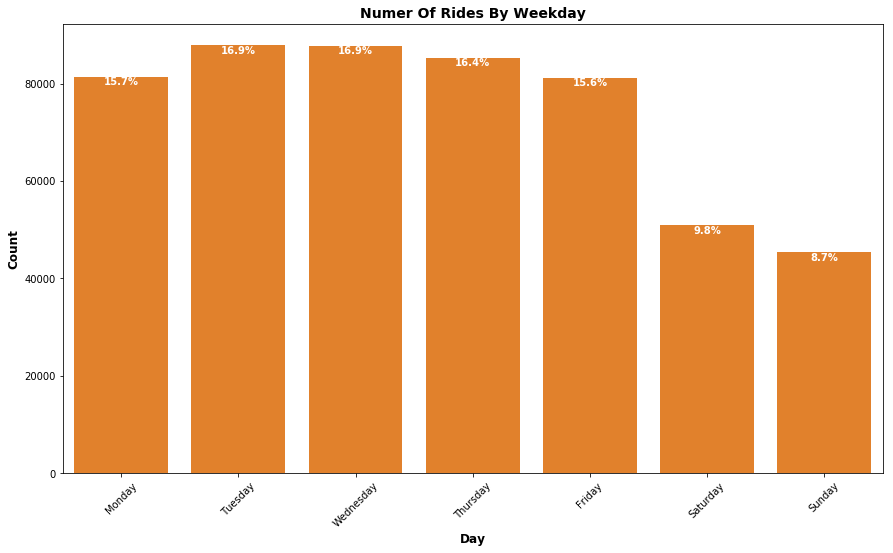

In [57]:
plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[1]

#--Defining the graph
sb.countplot(data = df, x='dayofweek_start', color = base_color)


n_points = df.shape[0]
cat_counts = df['dayofweek_start'].value_counts()
locs, labels = plt.xticks(rotation = 45)

#--Setting the percentage
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', va='top', color = 'w', weight = 'heavy')
    
# Add title and format it
plt.title('Numer of rides by weekday'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Count'.title(),
               fontsize = 12, weight = "bold")

This graph makes show us that the weekdays that have more rides are: Tuesday, Wednesday and Thursday. What has had surprised me was the number of rides on weekends.  I thought that most of the rides were made on weekends when people had more time to enjoy their free time. Two things come up:  maybe people stay more time with bicycles on the weekend than on weekdays because they use it for leisure time and on the weekdays they use it for transportation, more quickly and in a functional way. So it can be a different habit by day use. By now we have answered our first question, but new's ones has come up!

> Next steps - investigate the average use duration on the weekend vs weekdays.

### Checking the dataset main features

In the next visualizations we'll be looking deeper into the features, trying to make a baseline for futher investigations. In this part we are using only univariate exploration, so we'll be analyzing feature by feature.

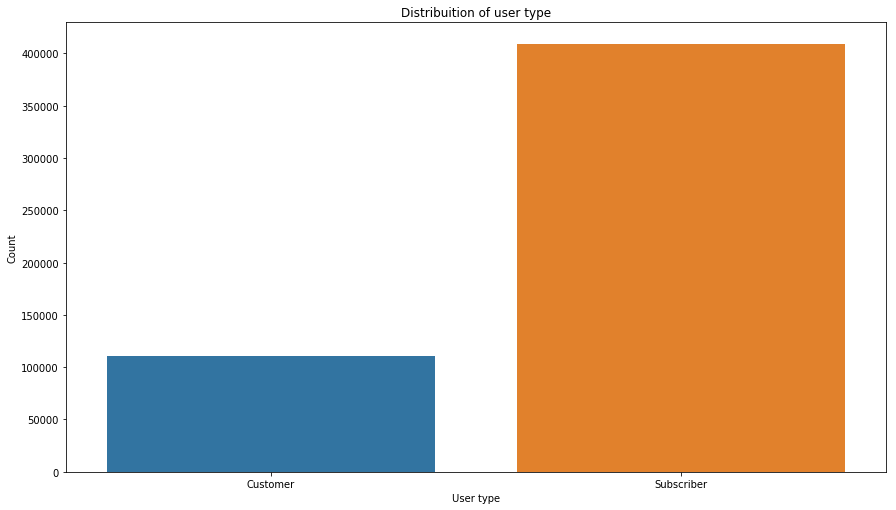

In [58]:
plt.figure(figsize=[14.70, 8.27])
#--Defining the graph
sb.countplot(data = df, x='user_type');
plt.title("Distribuition of user type")
plt.xlabel("User type")
plt.ylabel("Count");

> Majority of subscribers.

In [54]:
#--Looking for log informatiton to scale (duration) in the next graph
np.log10(df.duration_min.describe())

count    5.715753
mean     1.262850
std      1.758930
min      0.007179
25%      0.803912
50%      0.997095
75%      1.194052
max      3.158207
Name: duration_min, dtype: float64

Text(0, 0.5, 'Count Of Rides')

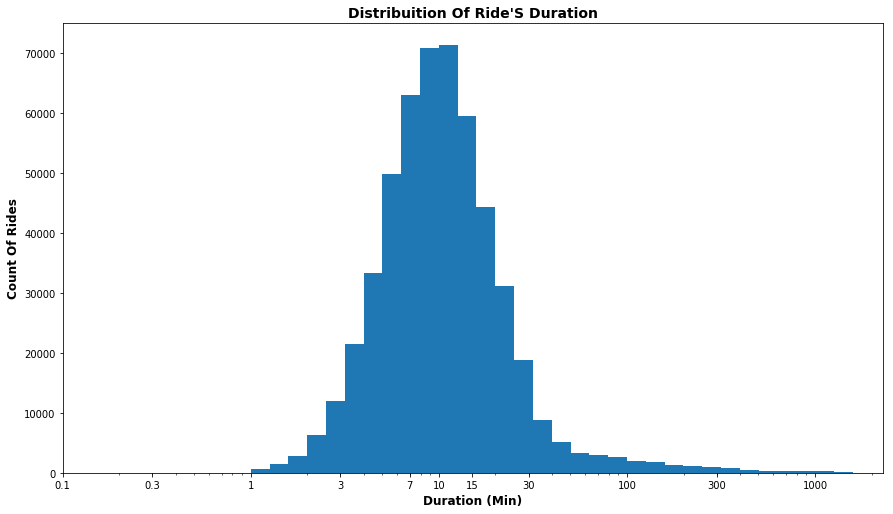

In [59]:
#--Plotting a distribuition with log scale x ticks
plt.figure(figsize=[14.70, 8.27])
bins = 10 ** np.arange(0,3.15+0.1,0.1)
ticks = [0.1,0.3,1,3,7,10,15,30,100,300,1000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);

# Add title and format it
plt.title("Distribuition of ride's duration".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Duration (min)'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Count of rides'.title(),
               fontsize = 12, weight = "bold")

> This visualization shows that the most of rides has a duration in a range of 5 to 20 minutes. It's unimodal graph. As the ride's duration time is wide: we have rides duration from seconds to almost a day long, we scaled it in order to have a better look in the distribuition of the rides.

## Bivariate Exploration


Now, performing a bivariate exploration we'll be able to seek for some relationship between are the features and find some anwsers to our questions.

In this first graph, there is the relation between ride's duration and weekdays, as well the answer for the second question:

### 2. How long does the average trips takes? Does it changes over the weekday?

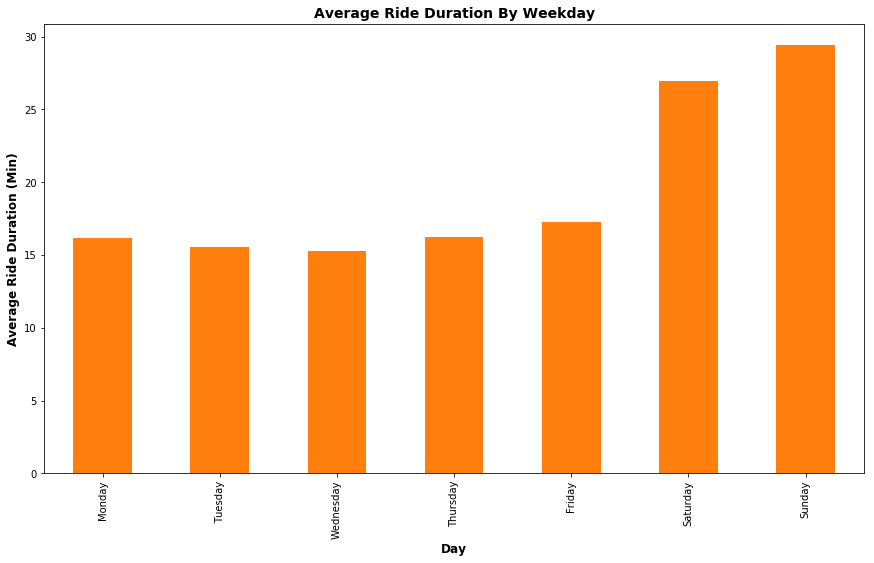

In [61]:
plt.figure(figsize=[14.70, 8.27])

base_color = sb.color_palette()[1]
df.groupby('dayofweek_start')['duration_min'].mean().plot(kind = "bar", color = base_color);

# Add title and format it
plt.title("Average ride duration by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Average ride duration (min)'.title(),
               fontsize = 12, weight = "bold");

In [39]:
#--Average of ride's duration by weekday
print(df.groupby('dayofweek_start')['duration_min'].mean())

dayofweek_start
Monday       16.135181
Tuesday      15.567019
Wednesday    15.294549
Thursday     16.259663
Friday       17.278022
Saturday     26.976056
Sunday       29.410955
Name: duration_min, dtype: float64


#### Violin Visualization

In [40]:
#--As the duration time of rides are widely, I choose to do these two subcut in the df 
#--in order to have a better visualization

df_durationsub_100 = df.loc[df['duration_min'] <= 100]
df_durationsub_45 = df.loc[df['duration_min'] <= 45]

C:\Users\naomi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


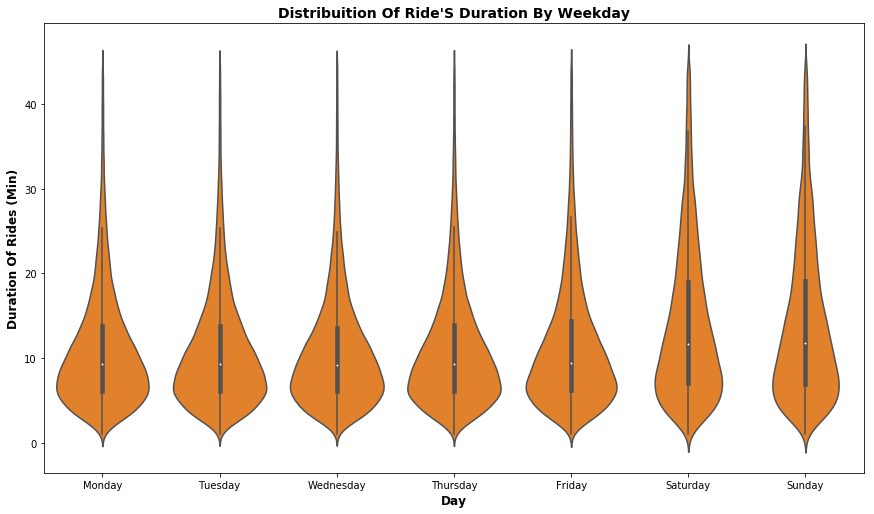

In [73]:
plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[1]

#--Plotting the graph
sb.violinplot(data = df_durationsub_45, x = 'dayofweek_start', y = 'duration_min',
              color = base_color);

# Add title and format it
plt.title("Distribuition of ride's duration by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Duration of rides (min)'.title(),
               fontsize = 12, weight = "bold");

#### BoxPlot Visualization

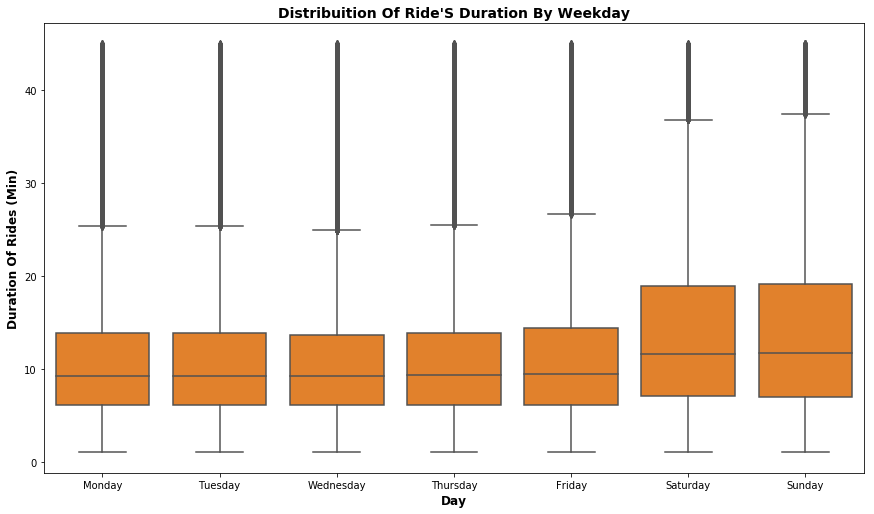

In [72]:
plt.figure(figsize=[14.70, 8.27])

base_color = sb.color_palette()[1]

sb.boxplot(data = df_durationsub_45, x = 'dayofweek_start', y = 'duration_min',
              color = base_color);

# Add title and format it
plt.title("Distribuition of ride's duration by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Duration of rides (min)'.title(),
               fontsize = 12, weight = "bold");

We were right!! The ride's duration on the weekend is significantly larger than on weekdays. We can see that on weekdays the average duration is almost the same 15 to 17 minutes but on Saturday or Sunday, it rises for more than 26 minutes. 
So, ride's duration has a connection if the day is a week or a weekend. Next steps would be: does the type of user related to this? 
Which happens to be our third question.

### 3. Does the above depend on if a user is a subscriber or a customer?
### Do they have a different habit behaviour?

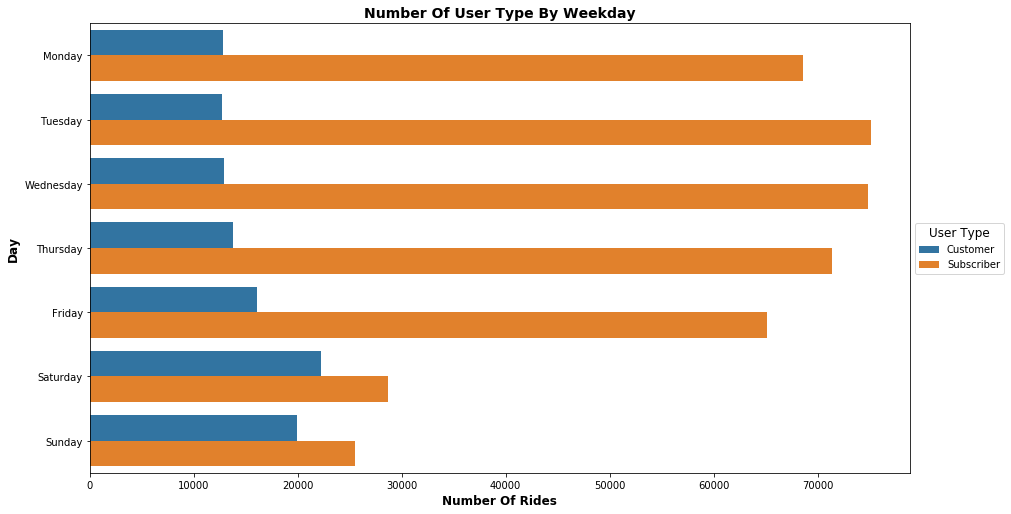

In [74]:
plt.figure(figsize=[14.70, 8.27])

sb.countplot(data = df, y='dayofweek_start', hue = 'user_type');


# Add title and format it
plt.title("Number of user type by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Number of rides'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="User Type", title_fontsize = 12);

In [44]:
#--Average ride's duration by weekday and user
print(df.groupby(by = ['user_type','dayofweek_start'])['duration_min'].mean())

user_type   dayofweek_start
Customer    Monday             41.814485
            Tuesday            39.144952
            Wednesday          38.327595
            Thursday           40.209360
            Friday             40.039432
            Saturday           44.581283
            Sunday             49.738875
Subscriber  Monday             11.341740
            Tuesday            11.569680
            Wednesday          11.314927
            Thursday           11.624314
            Friday             11.667631
            Saturday           13.318471
            Sunday             13.540184
Name: duration_min, dtype: float64


On this visualization, it is possible to observe that subscribers ride more on weekdays than on the weekend and customers ride more on the weekend, which can indicate that subscribers have different behaviour than consumers.
On the table, it's possible to affirm that the average of rides duration it's significantly different for subscribers and costumers.

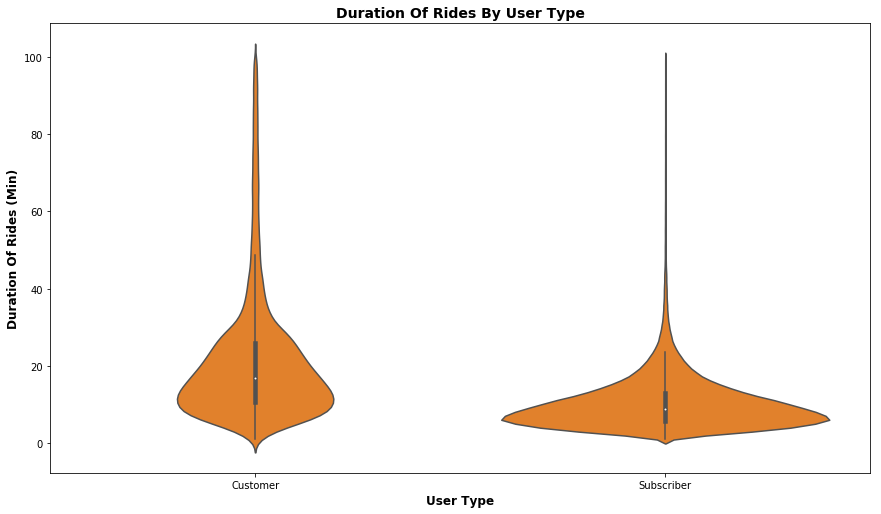

In [69]:
plt.figure(figsize=[14.70, 8.27])

base_color = sb.color_palette()[1]

sb.violinplot(data = df_durationsub_100, x = 'user_type', y = 'duration_min',
              color = base_color)

# Add title and format it
plt.title("Duration of Rides by User Type".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Duration of rides (min)'.title(),
               fontsize = 12, weight = "bold");

This visualization makes clear that subscribers and costumers have a significantly difference in ride's duration.

 By this Bivariate Exploration, the questions made in the previous section found an answer. The rides on weekends are longer than on weekdays, the number of "customer" type of user increases significantly on the weekend and it has a ride's duration average longer than subscribers. For this reason, we are close to affirming with certainty that the type of user is defining which kind of habits its user has.  Now what is missing to prove that consumer and subscribers have a really different behaviour is a visualization which can demonstrate that relation exits or not.

> Before going on the analysis, these graphs below were attempts to understand or find out some pattern about the bike's stations. What I could conclude is that three major areas (geographically) concentrate all flow of bicycles and almost all every station in the top 20 more frequently stations, is a train, ferry or bus station. As I couldn't develop more about this topic I'll just drop from the presentation and leave it here for further investigation. 

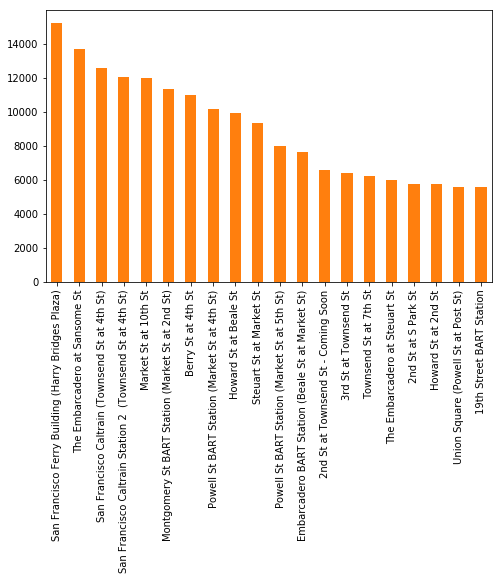

In [46]:
plt.figure(figsize=(8,5))
base_color = sb.color_palette()[1]

df['start_station_name'].value_counts().head(20).plot(kind='bar', color = base_color);

C:\Users\naomi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


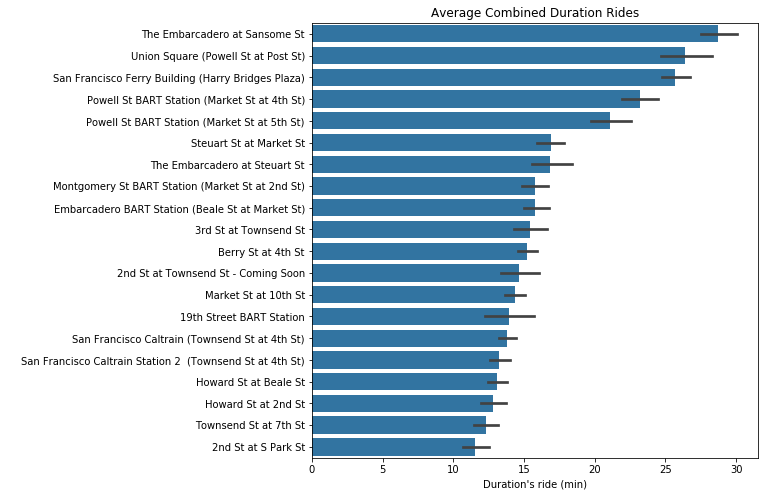

In [47]:
plt.figure(figsize = (8,8))
threshold = 5557 # Frequency of the 20th station 
make_frequency = df['start_station_name'].value_counts()
idx = np.sum(make_frequency > threshold)

most_makes = make_frequency.index[:idx]
df_sub = df.loc[df['start_station_name'].isin(most_makes)]

make_means = df_sub.groupby('start_station_name').mean()
comb_order = make_means.sort_values('duration_min', ascending = False).index

base_color = sb.color_palette()[0]
sb.barplot(data = df_sub, x = 'duration_min', y = 'start_station_name', 
           color = base_color, order = comb_order)
plt.xlabel("Duration's ride (min)")
plt.ylabel(" ")

plt.title("Average Combined Duration Rides");

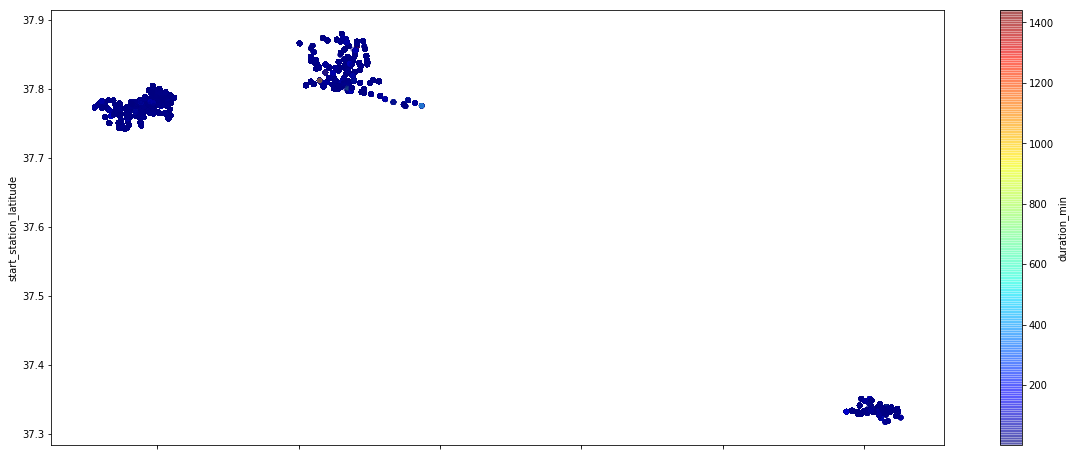

In [48]:
#--Setting a scatter plot to observe geografic location
_ = df.plot(kind = 'scatter', x = 'start_station_longitude', y = 'start_station_latitude', 
        c= 'duration_min', cmap = plt.get_cmap("jet"), colorbar = True,
        alpha = 0.4, figsize =(20,8));

plt.xlabel("Start Station Longitude")
plt.show()

## Multivariate Exploration

On this last part of exploration, we'll be plotting relationship visualization attempting to finally verify the relation between the features: user type, weekday and duration of rides. In order to, trace the different behaviour habits to these two type of users.

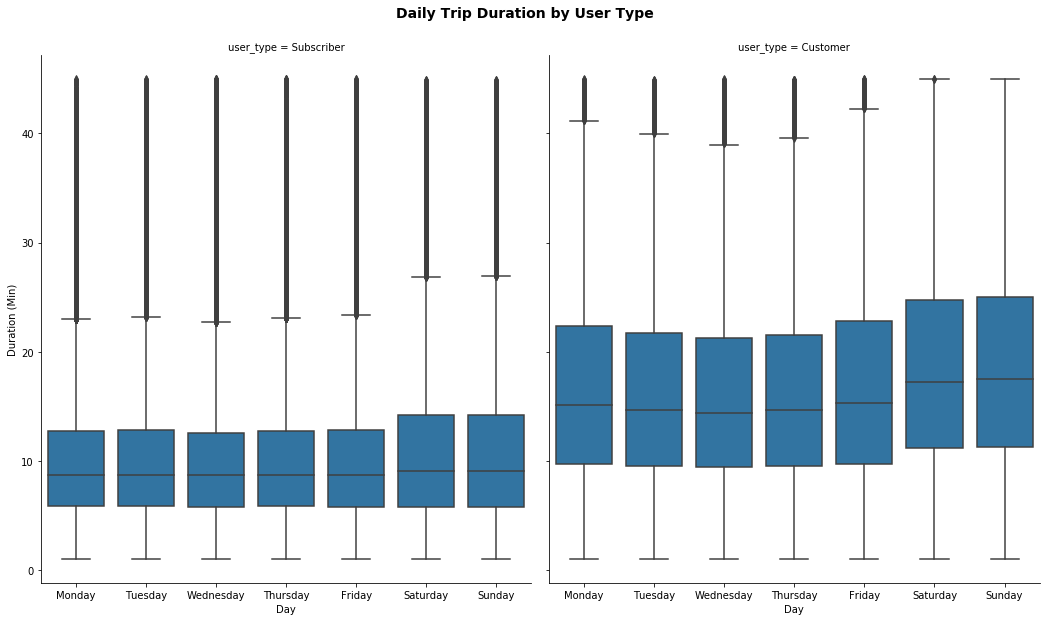

In [76]:
g = sb.FacetGrid(data = df_durationsub_45, col = 'user_type', height = 8.27, aspect = (14.70/2)/8.27)
g.map(sb.boxplot, 'dayofweek_start', 'duration_min');

plt.suptitle("Daily Trip Duration by User Type", y = 1.04, fontsize = 14, weight = 'bold')

g.set_axis_labels('Day', 'Duration (Min)');

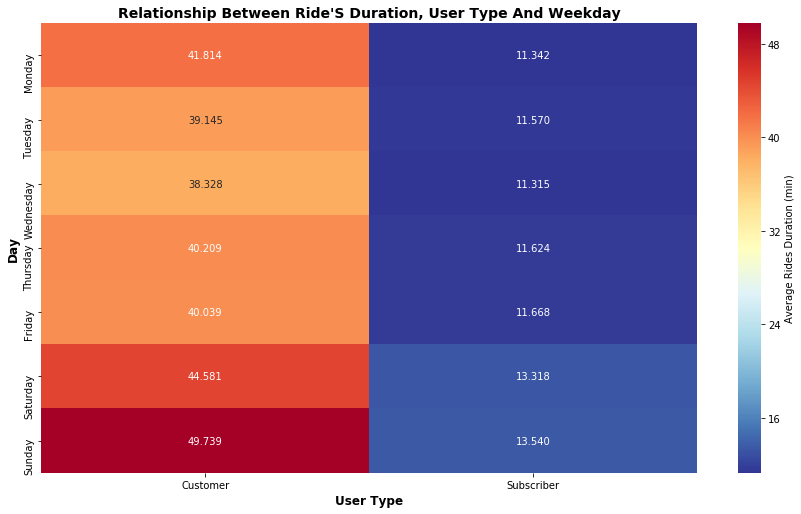

In [92]:
plt.figure(figsize=[14.70, 8.27])

#--Calculating the average of ride's duration
#--Transforming the data in a pivot table to plot the heatmap
cat_means = df.groupby(['user_type','dayofweek_start']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'dayofweek_start', columns = 'user_type', 
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Duration (min)'}, cmap = 'RdYlBu_r')


# Add title and format it
plt.title("Relationship between ride's duration, user type and weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold");

## Conclusion

Finally, in this Multivariate Visualization, we could put together: user type, duration of rides and weekdays. And now it's possible to affirm that customer and subscribers have very different behaviour. Subscribers use the Bay Wheels more frequently and on a weekday, it's part of his mobility journey and rides are faster. As for customers, they use Bay Wheels's bikes on the weekend, stays more time with it and use it to enjoy their free time.

So by analyzing this dataset, we were able to find out two very different groups of users, which have distinct behaviour and needs. Bay Wheels should understand both of their user types and base their strategical decisions to fully attend their needs. 